In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, kendalltau
from read_data import *

%load_ext autoreload
%autoreload 2

## Main text analyses

In [2]:
allsubjdata = pd.read_csv('data/allsubjdata.csv')

In [3]:
allsubjdata

,scene,expected,initview,finalview,img_2,img_3,img_4,probe_1,probe_2,int_diff,p_exp,response,corr_resp,hit,rt,subject,date,time
0,7.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0040.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,-0.500,0.75,f,j,0.0,361.3,912,20220511,1652269698441
1,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,-0.550,0.75,f,f,1.0,381.1,912,20220511,1652269698441
2,10.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene10_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0035.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0050.png,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,Translate_Views_FixedLight/Scene10_-1.0_0090_0...,0.550,0.75,j,j,1.0,330.1,912,20220511,1652269698441
3,3.0,1.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0015.png,Zoom_Sequences_FixedLight/Scene3_2.0_0055.png,Zoom_Sequences_FixedLight/Scene3_2.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.5...,0.500,0.75,f,j,0.0,332.1,912,20220511,1652269698441
4,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,0.550,0.75,f,j,0.0,603.4,912,20220511,1652269698441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_2.0_0030_0.0...,Translate_Views_FixedLight/Scene1_2.0_0030_1.0...,0.950,0.25,NaN,j,NaN,NaN,1459,20220910,1662807993840
53180,7.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0030.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_2.0_0090_-0....,Translate_Views_FixedLight/Scene7_2.0_0090_-1....,-0.950,0.25,j,j,1.0,475.6,1459,20220910,1662807993840
53181,1.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene1_2.0_0015.png,Zoom_Sequences_FixedLight/Scene1_2.0_0020.png,Zoom_Sequences_FixedLight/Scene1_2.0_0040.png,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,0.925,0.25,f,f,1.0,398.3,1459,20220910,1662807993840
53182,3.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene3_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0045.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,-0.925,0.25,f,f,1.0,344.6,1459,20220910,1662807993840


In [4]:
allsubjdata['abs_diff'] = allsubjdata['int_diff'].abs()

In [5]:
exclude_subjs = subject_exclusion(allsubjdata)
allsubjdata_noexcl = allsubjdata.copy()
allsubjdata = allsubjdata[~allsubjdata.subject.isin(exclude_subjs)]
print(f'Excluded {len(exclude_subjs)} out of {allsubjdata_noexcl.subject.nunique()} subjects.')
print('Final sample size:', allsubjdata.subject.nunique())

Excluded 126 out of 277 subjects.
Final sample size: 151


In [6]:
allsubjdata['abs_diff'].unique()

array([0.5  , 0.55 , 0.6  , 0.65 , 0.7  , 0.75 , 0.8  , 0.85 , 0.9  ,
       0.95 , 1.   , 0.95 , 0.9  , 0.85 , 0.8  , 0.75 , 0.7  , 0.65 ,
       0.6  , 0.675, 0.725, 0.625, 0.575, 0.55 , 0.525, 0.5  , 0.475,
       0.45 , 0.425, 0.4  , 0.375, 0.35 , 0.325, 0.3  , 0.275, 0.25 ,
       0.45 , 0.525, 0.475, 0.45 , 0.425, 0.4  , 0.375, 0.35 , 0.325,
       0.3  , 0.275, 0.25 , 0.225, 0.2  , 0.175, 0.15 , 0.575, 0.975,
       0.925, 0.875, 0.825, 0.775, 0.675, 0.625, 0.725, 0.775, 0.825,
       0.875, 0.925, 0.975, 0.4  , 0.35 , 0.3  , 0.25 , 0.325, 0.275,
       0.225, 0.2  , 0.35 , 0.375, 0.175, 0.15 , 0.125, 0.1  , 0.275,
       0.3  , 0.325, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.375,
       0.325, 0.3  , 0.275, 0.25 , 0.225, 0.2  , 0.175, 0.15 , 0.125,
       0.1  , 0.075, 0.05 , 0.025, 0.05 , 0.075, 0.55 , 0.575, 0.6  ,
       0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825,
       0.5  , 0.45 , 0.4  , 0.425, 0.475, 0.525, 0.55 , 0.575, 0.6  ,
       0.625, 0.375,

In [7]:
median_labels = ['first', 'second']
allsubjdata['diff_half'] = pd.qcut(
    allsubjdata['abs_diff'],
    q=2,
    labels=median_labels,
    duplicates='drop'
)

/var/folders/8d/bvdwvdxj3s98cz8_ylgl_9j00000gn/T/ipykernel_74941/3504345482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allsubjdata['diff_half'] = pd.qcut(


In [8]:
allsubjdata[allsubjdata['diff_half']=='second']

,scene,expected,initview,finalview,img_2,img_3,img_4,probe_1,probe_2,int_diff,p_exp,response,corr_resp,hit,rt,subject,date,time,abs_diff,diff_half
395,3.0,1.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0030.png,Zoom_Sequences_FixedLight/Scene3_2.0_0035.png,Zoom_Sequences_FixedLight/Scene3_2.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.1...,Translate_Views_FixedLight/Scene3_2.0_0090_0.1...,0.800,0.75,j,f,0.0,1840.6,914,20220511,1652269532447,0.800,second
396,10.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene10_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0040.png,Translate_Views_FixedLight/Scene10_-1.0_0090_0...,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,-0.850,0.75,f,j,0.0,1002.2,914,20220511,1652269532447,0.850,second
397,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,0.900,0.75,f,j,0.0,1470.8,914,20220511,1652269532447,0.900,second
398,3.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0020.png,Zoom_Sequences_FixedLight/Scene3_2.0_0030.png,Zoom_Sequences_FixedLight/Scene3_2.0_0035.png,Translate_Views_FixedLight/Scene3_-1.0_0090_-0...,Translate_Views_FixedLight/Scene3_-1.0_0090_0....,0.950,0.75,f,j,0.0,1317.1,914,20220511,1652269532447,0.950,second
399,7.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Translate_Views_FixedLight/Scene7_2.0_0030_0.0...,Translate_Views_FixedLight/Scene7_2.0_0030_-1....,-1.000,0.75,j,j,1.0,1894.2,914,20220511,1652269532447,1.000,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_2.0_0030_0.0...,Translate_Views_FixedLight/Scene1_2.0_0030_1.0...,0.950,0.25,NaN,j,NaN,NaN,1459,20220910,1662807993840,0.950,second
53180,7.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0030.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_2.0_0090_-0....,Translate_Views_FixedLight/Scene7_2.0_0090_-1....,-0.950,0.25,j,j,1.0,475.6,1459,20220910,1662807993840,0.950,second
53181,1.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene1_2.0_0015.png,Zoom_Sequences_FixedLight/Scene1_2.0_0020.png,Zoom_Sequences_FixedLight/Scene1_2.0_0040.png,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,0.925,0.25,f,f,1.0,398.3,1459,20220910,1662807993840,0.925,second
53182,3.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene3_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0045.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,-0.925,0.25,f,f,1.0,344.6,1459,20220910,1662807993840,0.925,second


In [ ]:
# Get mean accuracy per participant, for each experiment
allsubjdata = compute_dprimes(allsubjdata)
p75data = allsubjdata[allsubjdata['p_exp']==0.75]
p50data = allsubjdata[allsubjdata['p_exp']==0.5]
p25data = allsubjdata[allsubjdata['p_exp']==0.25]
p75means = p75data.groupby(['subject', 'expected']).mean(numeric_only=True).reset_index()
p50means = p50data.groupby(['subject', 'expected']).mean(numeric_only=True).reset_index()
p25means = p25data.groupby(['subject', 'expected']).mean(numeric_only=True).reset_index()
allmeans = allsubjdata.groupby(['subject', 'expected', 'p_exp']).mean(numeric_only=True).reset_index()

allmeans_byintensity = allsubjdata.groupby(['expected', 'diff_half']).mean(numeric_only=True).reset_index()

/var/folders/8d/bvdwvdxj3s98cz8_ylgl_9j00000gn/T/ipykernel_74941/1800299513.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  allmeans_byintensity = allsubjdata.groupby(['expected', 'p_exp', 'diff_half']).mean(numeric_only=True).reset_index()


<Axes: xlabel='diff_half', ylabel='dprime'>

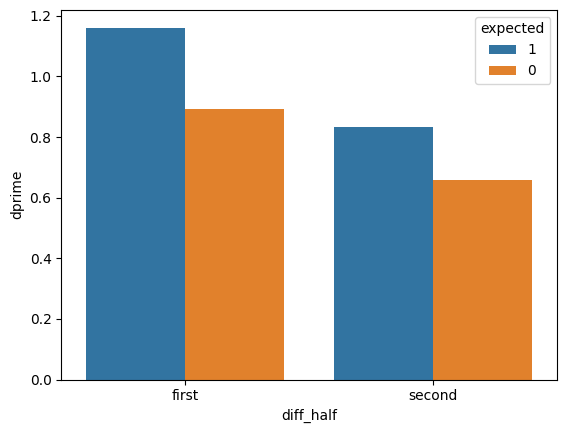

In [27]:
sns.barplot(data=allmeans_byintensity[allmeans_byintensity['p_exp']==0.75], x='diff_half', y='dprime', hue='expected', hue_order=[1, 0])

<Axes: xlabel='diff_half', ylabel='dprime'>

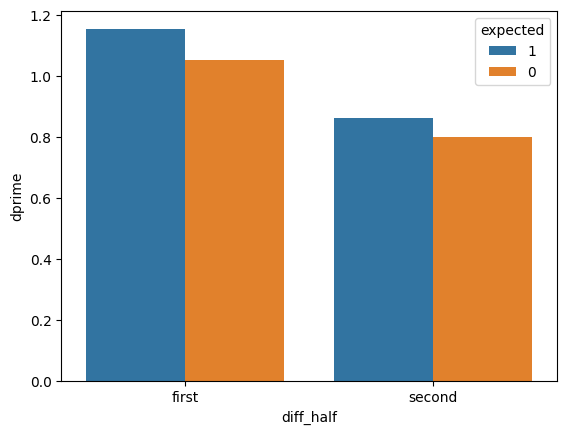

In [26]:
sns.barplot(data=allmeans_byintensity[allmeans_byintensity['p_exp']==0.5], x='diff_half', y='dprime', hue='expected', hue_order=[1, 0])

<Axes: xlabel='diff_half', ylabel='dprime'>

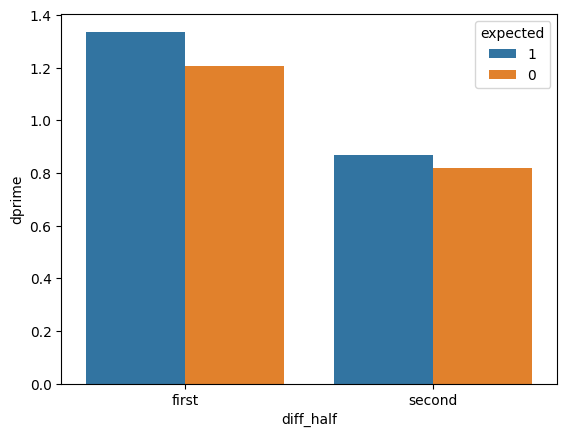

In [25]:
sns.barplot(data=allmeans_byintensity[allmeans_byintensity['p_exp']==0.25], x='diff_half', y='dprime', hue='expected', hue_order=[1, 0])

In [11]:
p50means

,subject,expected,scene,initview,finalview,int_diff,p_exp,hit,rt,date,time,abs_diff,dprime,criterion
0,1031,0.0,5.25,0.5,60.0,0.073437,0.5,0.645833,507.569792,20220801.0,1.659346e+12,0.758854,0.779778,0.199567
1,1031,1.0,5.25,0.5,60.0,-0.022135,0.5,0.656250,537.240625,20220801.0,1.659346e+12,0.777865,0.849575,0.214359
2,1032,0.0,5.25,0.5,60.0,0.059896,0.5,0.656250,449.965625,20220801.0,1.659346e+12,0.815104,0.783513,0.066095
3,1032,1.0,5.25,0.5,60.0,0.056771,0.5,0.697917,387.511458,20220801.0,1.659346e+12,0.809896,1.219029,0.406707
4,1033,0.0,5.25,0.5,60.0,-0.011198,0.5,0.705263,478.398947,20220801.0,1.659346e+12,0.683594,1.088341,-0.232251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1338,1.0,5.25,0.5,60.0,-0.075000,0.5,0.673684,620.941053,20220907.0,1.662532e+12,0.570833,0.852629,0.190985
96,1339,0.0,5.25,0.5,60.0,-0.101302,0.5,0.708333,563.187500,20220907.0,1.662532e+12,0.577865,1.082496,0.293524
97,1339,1.0,5.25,0.5,60.0,0.027865,0.5,0.768421,494.760000,20220907.0,1.662532e+12,0.562760,1.496684,0.155925
98,1346,0.0,5.25,0.5,60.0,0.064583,0.5,0.718750,553.072917,20220908.0,1.662621e+12,0.777083,1.157745,0.212766


In [16]:
allsubjdata[(allsubjdata['subject']==914)&(allsubjdata['diff_half']=='second')&(allsubjdata['expected']==0.0)]

,scene,expected,initview,finalview,img_2,img_3,img_4,probe_1,probe_2,int_diff,...,corr_resp,hit,rt,subject,date,time,abs_diff,diff_half,dprime,criterion
398,3.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0020.png,Zoom_Sequences_FixedLight/Scene3_2.0_0030.png,Zoom_Sequences_FixedLight/Scene3_2.0_0035.png,Translate_Views_FixedLight/Scene3_-1.0_0090_-0...,Translate_Views_FixedLight/Scene3_-1.0_0090_0....,0.95,...,j,0.0,1317.1,914,20220511,1652269532447,0.95,second,0.861424,-0.075222
399,7.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Translate_Views_FixedLight/Scene7_2.0_0030_0.0...,Translate_Views_FixedLight/Scene7_2.0_0030_-1....,-1.00,...,j,1.0,1894.2,914,20220511,1652269532447,1.00,second,0.861424,-0.075222
400,10.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene10_2.0_0040.png,Zoom_Sequences_FixedLight/Scene10_2.0_0045.png,Zoom_Sequences_FixedLight/Scene10_2.0_0060.png,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,Translate_Views_FixedLight/Scene10_-1.0_0090_0...,1.00,...,j,1.0,1240.7,914,20220511,1652269532447,1.00,second,0.861424,-0.075222
413,10.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene10_2.0_0030.png,Zoom_Sequences_FixedLight/Scene10_2.0_0050.png,Zoom_Sequences_FixedLight/Scene10_2.0_0060.png,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,0.85,...,f,0.0,880.7,914,20220511,1652269532447,0.85,second,0.861424,-0.075222
416,10.0,0.0,2.0,30.0,Zoom_Sequences_FixedLight/Scene10_2.0_0015.png,Zoom_Sequences_FixedLight/Scene10_2.0_0020.png,Zoom_Sequences_FixedLight/Scene10_2.0_0025.png,Translate_Views_FixedLight/Scene10_-1.0_0030_0...,Translate_Views_FixedLight/Scene10_-1.0_0030_0...,0.85,...,j,1.0,666.2,914,20220511,1652269532447,0.85,second,0.861424,-0.075222
417,3.0,0.0,2.0,30.0,Zoom_Sequences_FixedLight/Scene3_2.0_0015.png,Zoom_Sequences_FixedLight/Scene3_2.0_0020.png,Zoom_Sequences_FixedLight/Scene3_2.0_0025.png,Translate_Views_FixedLight/Scene3_-1.0_0030_-0...,Translate_Views_FixedLight/Scene3_-1.0_0030_0....,0.85,...,j,1.0,1234.2,914,20220511,1652269532447,0.85,second,0.861424,-0.075222


In [13]:
allmeans_byintensity

,subject,expected,p_exp,diff_half,scene,initview,finalview,int_diff,hit,rt,date,time,abs_diff,dprime,criterion
0,914,0.0,0.25,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,914,0.0,0.25,second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,914,0.0,0.50,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,914,0.0,0.50,second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,914,0.0,0.75,first,4.97619,0.357143,60.0,0.027381,0.682927,887.173171,20220511.0,1.652270e+12,0.564286,0.861424,-0.075222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,1459,1.0,0.25,second,5.25000,0.500000,60.0,-0.044271,0.574468,613.959574,20220910.0,1.662808e+12,0.969271,0.470025,0.845307
1808,1459,1.0,0.50,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,1459,1.0,0.50,second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,1459,1.0,0.75,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


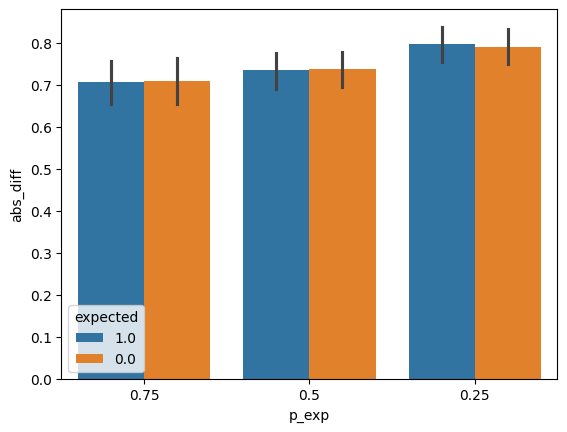

In [9]:
sns.barplot(data=allmeans, x='p_exp', order=[0.75, 0.5, 0.25], y='abs_diff',
            hue='expected', hue_order=[1.0, 0.0])
plt.show()

In [ ]:
pg.mixed_anova(data=allmeans[allmeans['p_exp'].isin([0.75, 0.25])], subject='subject', between='p_exp',
               within='expected', dv='abs_diff')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,p_exp,0.378078,1,99,0.378078,6.420807,0.012847,0.060906,NaN
1,expected,0.000240,1,99,0.000240,1.151194,0.285908,0.011495,1.0
2,Interaction,0.000738,1,99,0.000738,3.548832,0.062522,0.034606,NaN


### Experiment 1

In [ ]:
p75_overall = p75data.groupby(['subject']).mean().reset_index()
p75_overall['hit'].agg(['mean', 'sem'])

In [ ]:
p75_overall['criterion'].mean()

In [ ]:
pg.ttest(p75_overall['criterion'], 0.0)

In [ ]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

In [ ]:
# Plot accuracy for congruent and incongruent trials
make_pretty_plot(p75means, measure='hit', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p75means, measure='dprime', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p75means, measure='criterion', cloudplot=False, saveimg=True)

### Experiment 2

In [ ]:
p50_overall = p50data.groupby(['subject']).mean().reset_index()
p50_overall['hit'].agg(['mean', 'sem'])

In [ ]:
p50_overall['criterion'].mean()

In [ ]:
pg.ttest(p50_overall['criterion'], 0.0)

In [ ]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p50means[p50means['expected']==1].hit, 
         p50means[p50means['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p50means, measure='hit', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p50means, measure='dprime', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p50means, measure='criterion', cloudplot=False, saveimg=True)

### Experiment 3

In [ ]:
p25_overall = p25data.groupby(['subject']).mean().reset_index()
p25_overall['hit'].agg(['mean', 'sem'])

In [ ]:
p25_overall['criterion'].mean()

In [ ]:
pg.ttest(p25_overall['criterion'], 0.0)

In [ ]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p25means[p25means['expected']==1].hit, 
         p25means[p25means['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p25means, measure='hit', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p25means, measure='dprime', cloudplot=False, saveimg=True)

In [ ]:
make_pretty_plot(p25means, measure='criterion', cloudplot=False, saveimg=True)

### Probability-congruency interaction (across experiments)

In [ ]:
allmeans.subject.nunique()

In [ ]:
aov = pg.mixed_anova(dv='hit', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)

In [ ]:
aov = pg.mixed_anova(dv='dprime', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)

In [ ]:
aov = pg.mixed_anova(dv='criterion', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)

In [ ]:
allhitdiffs = []
allpexp = []
for pe in allmeans.p_exp.unique():
    thesediffs = list(allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==1)].hit.values - \
        allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==0)].hit.values)
    allhitdiffs.extend(thesediffs)
    allpexp.extend([pe] * len(thesediffs))
allhitdiffs = pd.DataFrame(list(zip(allpexp, allhitdiffs)), columns =['p_exp', 'diff'])

In [ ]:
# Pairwise tests
pairwisepvals = []
for pair in [[0.75, 0.5], [0.75, 0.25], [0.5, 0.25]]:
    tstats = pg.ttest(allhitdiffs[allhitdiffs['p_exp']==pair[0]]['diff'], allhitdiffs[allhitdiffs['p_exp']==pair[1]]['diff'])
    print(f"{pair[0]} vs. {pair[1]}")
    print('===================')
    pg.print_table(tstats)
    pairwisepvals.append(tstats['p-val'])
    print('-------------------')

In [ ]:
# Correct for multiple comparisons
pg.multicomp(pairwisepvals, method='bonf')

### Criterion-d' correlation

In [ ]:
sns.scatterplot(allmeans['hit'], allmeans['criterion'])
plt.show()

In [ ]:
pearsonr(p75means['hit'], p75means['criterion'])

In [ ]:
pearsonr(p75means['hit'], p75means['criterion'])

In [ ]:
allmeans

In [ ]:
sns.scatterplot(x='dprime', y='criterion', hue='p_exp', 
                hue_order=[0.75, 0.5, 0.25], data=allmeans[allmeans['expected']==1], palette='Set1')
plt.show()

In [ ]:
sns.scatterplot(x='dprime', y='criterion', data=allmeans[allmeans['expected']==0], palette='Set1')
plt.show()

In [ ]:
pearsonr(allmeans[allmeans['expected']==1]['dprime'], allmeans[allmeans['expected']==1]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==0]['dprime'], allmeans[allmeans['expected']==0]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==1]['hit'], allmeans[allmeans['expected']==1]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==0]['hit'], allmeans[allmeans['expected']==0]['criterion'])

In [ ]:
sns.scatterplot(allmeans['hit'], allmeans['dprime'])
plt.show()

In [ ]:
pearsonr(allmeans['hit'], allmeans['dprime'])

## Supplemental analyses

### Results without exclusions

In [ ]:
allsubjdata_noexcl = compute_dprimes(allsubjdata_noexcl)
p75means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.75].groupby(
    ['subject', 'expected']).mean().reset_index()
p50means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.5].groupby(
    ['subject', 'expected']).mean().reset_index()
p25means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.25].groupby(
    ['subject', 'expected']).mean().reset_index()
allmeans_noexcl = allsubjdata_noexcl.groupby([
    'subject', 'expected', 'p_exp']).mean().reset_index()

Experiment 1

In [ ]:
p75means_noexcl.groupby(['expected'])[['hit']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].hit, 
         p75means_noexcl[p75means_noexcl['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].dprime, 
         p75means_noexcl[p75means_noexcl['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].criterion, 
         p75means_noexcl[p75means_noexcl['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p75means_noexcl, measure='hit', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p75means_noexcl, measure='dprime', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p75means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 2

In [ ]:
p50means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].hit, 
         p50means_noexcl[p50means_noexcl['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].dprime, 
         p50means_noexcl[p50means_noexcl['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].criterion, 
         p50means_noexcl[p50means_noexcl['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p50means_noexcl, measure='hit', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p50means_noexcl, measure='dprime', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p50means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 3

In [ ]:
p25means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].hit, 
         p25means_noexcl[p25means_noexcl['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].dprime, 
         p25means_noexcl[p25means_noexcl['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].criterion, 
         p25means_noexcl[p25means_noexcl['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p25means_noexcl, measure='hit', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p25means_noexcl, measure='dprime', excl=False, saveimg=True)

In [ ]:
make_pretty_plot(p25means_noexcl, measure='criterion', excl=False, saveimg=True)

### Sensitivity and bias

Experiment 1

In [ ]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p75means, measure='dprime')

In [ ]:
make_pretty_plot(p75means, measure='criterion')

Experiment 2

In [ ]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p50means, measure='dprime')

In [ ]:
make_pretty_plot(p50means, measure='criterion')

Experiment 3

In [ ]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p25means, measure='dprime')

In [ ]:
make_pretty_plot(p25means, measure='criterion')

### Final survey

In [ ]:
allsurveys = get_surveys(allsubjdata)

In [ ]:
allsurveys.subject.nunique()

In [ ]:
allsurveys.groupby(['p_exp'])[['sequence_attention', 
                               'object_expect',
                               'percent_expected']].agg(['mean', 'sem'])

In [ ]:
aov = pg.welch_anova(dv='sequence_attention', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [ ]:
aov = pg.welch_anova(dv='object_expect', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [ ]:
aov = pg.welch_anova(dv='percent_expected', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [ ]:
print('==================')
print('Overall')
print('------------------')
accdiffs = allmeans[allmeans['expected']==1].hit.values - \
           allmeans[allmeans['expected']==0].hit.values
critdiffs = allmeans[allmeans['expected']==1].criterion.values - \
            allmeans[allmeans['expected']==0].criterion.values
dprdiffs = allmeans[allmeans['expected']==1].dprime.values - \
           allmeans[allmeans['expected']==0].dprime.values
print('Accuracy-sequence attention correlation:')
stats = pg.corr(allsurveys.sequence_attention, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-object prediction correlation:')
stats = pg.corr(allsurveys.object_expect, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-probability estimate correlation:')
stats = pg.corr(allsurveys.percent_expected, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

for pe in [0.75, 0.5, 0.25]:
    print('==================')
    print('P(Exp) =', pe)
    print('------------------')
    thispexp = allmeans[allmeans['p_exp']==pe]
    critdiffs = thispexp[thispexp['expected']==1].criterion.values - \
                thispexp[thispexp['expected']==0].criterion.values
    dprdiffs = thispexp[thispexp['expected']==1].dprime.values - \
               thispexp[thispexp['expected']==0].dprime.values
    accdiffs = thispexp[thispexp['expected']==1].hit.values - \
               thispexp[thispexp['expected']==0].hit.values
    print('Accuracy-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-probability estimate correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')